In [1]:
%reset -f

In [2]:
import numpy as np
import time
from numpy import linalg as la
import scipy.sparse as sp
from scipy.sparse.linalg import spsolve
import matplotlib.pyplot as plt

# Données :

In [3]:
def f(x):
    return -90*x**8 + 20*x**9

# Partie A

## Première Méthode

### Avec Numpy

In [4]:
start_time = time.time()
N = 100
h = 1.0/N
print(f"N = {N} et h = {h}")

alpha = 0
beta = 1
d = 2/h**2
v = (-1/h**2) + 1/h
l = (-1/h**2) - 1/h

# Matrice A
A = np.diag(np.zeros(N-1)+d,k=0)
A = A + np.diag(np.zeros(N-2)+l,k=-1)
A = A + np.diag(np.zeros(N-2)+v,k=1)

G = np.zeros(N-1)
G[0] = alpha/h**2 + alpha/h
G[-1] = beta/h**2 - beta/h

x = np.arange(1,N)*h

b = f(x) + G

sol = x**10

y = la.solve(A,b)

print(f"L'erreur est de : {la.norm(y-sol,np.inf)}")
print(f"elapsed time : {time.time()-start_time}\n")

N = 100 et h = 0.01
L'erreur est de : 0.0002375627736551228
elapsed time : 0.007772684097290039



### Avec Scipy

In [21]:
start_time = time.time()
N = 100
h = 1.0/N
print(f"N = {N} et h = {h}")

alpha = 0
beta = 1
d = 2/h**2
v = (-1/h**2) + 1/h
l = (-1/h**2) - 1/h

offsets = np.array([-1,0,1])
data = [l*np.ones(N-1), d*np.ones(N-1), v*np.ones(N-1)]

A = sp.dia_matrix((data,offsets), shape=(N-1,N-1))
A = sp.csc_matrix(A)

G = np.zeros(N-1)
G[0] = alpha/h**2 + alpha/h
G[-1] = beta/h**2 - beta/h

x = np.arange(1,N)*h

b = f(x) + G

sol = x**10

y = spsolve(A,b)

print(f"L'erreur est de : {la.norm(y-sol,np.inf)}")
print(f"elapsed time : {time.time()-start_time}\n")

N = 100 et h = 0.01
L'erreur est de : 0.00023756277365544198
elapsed time : 0.0019979476928710938



## Deuxième Méthode

### Avec Numpy

In [22]:
start_time = time.time()
N = 100
h = 1.0/N
print(f"N = {N} et h = {h}")

alpha = 0
beta = 1
d = 2/h**2
v = (-1/h**2) + 1/h
l = (-1/h**2) - 1/h

# Matrice A
A = np.diag(np.zeros(N+1)+d,k=0)
A = A + np.diag(np.zeros(N)+l,k=-1)
A = A + np.diag(np.zeros(N)+v,k=1)
A[0,0],A[0,1] = 1,0
A[-1,-1],A[-1,-2] = 1,0

x = np.arange(1,N)*h

b = np.zeros(N+1)
b[0] = alpha
b[-1] = beta
b[1:N] = f(x)

sol = np.zeros(N+1)
sol[0] = alpha
sol[-1] = beta
sol[1:N] = x**10

y = la.solve(A,b)

print(f"L'erreur est de : {la.norm(y-sol,np.inf)}")
print(f"elapsed time : {time.time()-start_time}\n")

N = 100 et h = 0.01
L'erreur est de : 0.0002375627736418695
elapsed time : 0.007980108261108398



### Avec Scipy

In [25]:
start_time = time.time()
N = 100
h = 1.0/N
print(f"N = {N} et h = {h}")

alpha = 0
beta = 1
d = 2/h**2
v = (-1/h**2) + 1/h
l = (-1/h**2) - 1/h

offsets = np.array([-1,0,1])
data = [l*np.ones(N+1), d*np.ones(N+1), v*np.ones(N+1)]

A = sp.dia_matrix((data,offsets), shape=(N+1,N+1))
A = sp.csc_matrix(A)
A[0,0],A[0,1] = 1,0
A[-1,-1],A[-1,-2] = 1,0

x = np.arange(1,N)*h

b = np.zeros(N+1)
b[0] = alpha
b[-1] = beta
b[1:N] = f(x)

sol = np.zeros(N+1)
sol[0] = alpha
sol[-1] = beta
sol[1:N] = x**10

y = spsolve(A,b)

print(f"L'erreur est de : {la.norm(y-sol,np.inf)}")
print(f"elapsed time : {time.time()-start_time}\n")

N = 100 et h = 0.01
L'erreur est de : 0.0002375627736540542
elapsed time : 0.001990079879760742



# Partie B

## Schéma n°1

### Première méthode

#### Avec Numpy

In [26]:
start_time = time.time()
N = 100
h = 1.0/N
print(f"N = {N} et h = {h}")

alpha = 0
beta = 10
d = 2/h**2
v = (-1/h**2) + 1/h
l = (-1/h**2) - 1/h

# Matrice A
A = np.diag(np.zeros(N-1)+d,k=0)
A = A + np.diag(np.zeros(N-2)+l,k=-1)
A = A + np.diag(np.zeros(N-2)+v,k=1)
A[-1,-1] = 1/h**2 + 1/h

G = np.zeros(N-1)
G[0] = alpha/h**2 + alpha/h
G[-1] = beta/h - beta

x = np.arange(1,N)*h

b = f(x) + G

sol = x**10

y = la.solve(A,b)

print(f"L'erreur est de : {la.norm(y-sol,np.inf)}")
print(f"elapsed time : {time.time()-start_time}\n")

N = 100 et h = 0.01
L'erreur est de : 0.18815068585518302
elapsed time : 0.019986867904663086



#### Avec Scipy

In [28]:
start_time = time.time()
N = 100
h = 1.0/N
print(f"N = {N} et h = {h}")

alpha = 0
beta = 10
d = 2/h**2
v = (-1/h**2) + 1/h
l = (-1/h**2) - 1/h

offsets = np.array([-1,0,1])
data = [l*np.ones(N-1), d*np.ones(N-1), v*np.ones(N-1)]

A = sp.dia_matrix((data,offsets), shape=(N-1,N-1))
A = sp.csc_matrix(A)
A[-1,-1] = 1/h**2 + 1/h

G = np.zeros(N-1)
G[0] = alpha/h**2 + alpha/h
G[-1] = beta/h - beta

x = np.arange(1,N)*h

b = f(x) + G

sol = x**10

y = spsolve(A,b)

print(f"L'erreur est de : {la.norm(y-sol,np.inf)}")
print(f"elapsed time : {time.time()-start_time}\n")

N = 100 et h = 0.01
L'erreur est de : 0.18815068585519013
elapsed time : 0.0025985240936279297



### Deuxième méthode

#### Avec Numpy

In [29]:
start_time = time.time()
N = 100
h = 1.0/N
print(f"N = {N} et h = {h}")

alpha = 0
beta = 10
d = 2/h**2
v = (-1/h**2) + 1/h
l = (-1/h**2) - 1/h

# Matrice A
A = np.diag(np.zeros(N+1)+d,k=0)
A = A + np.diag(np.zeros(N)+l,k=-1)
A = A + np.diag(np.zeros(N)+v,k=1)
A[0,0],A[0,1] = 1,0
A[-1,-1], A[-1,-2] = 1/h,-1/h

x = np.arange(1,N)*h

b = np.zeros(N+1)
b[0] = alpha
b[-1] = beta
b[1:N] = f(x)

sol = np.zeros(N+1)
sol[0] = alpha
sol[-1] = 1
sol[1:N] = x**10

y = la.solve(A,b)

print(f"L'erreur est de : {la.norm(y-sol,np.inf)}")
print(f"elapsed time : {time.time()-start_time}\n")

N = 100 et h = 0.01
L'erreur est de : 0.192532760863938
elapsed time : 0.007977724075317383



#### Avec Scipy

In [31]:
start_time = time.time()
N = 100
h = 1.0/N
print(f"N = {N} et h = {h}")

alpha = 0
beta = 10
d = 2/h**2
v = (-1/h**2) + 1/h
l = (-1/h**2) - 1/h

offsets = np.array([-1,0,1])
data = [l*np.ones(N+1), d*np.ones(N+1), v*np.ones(N+1)]

A = sp.dia_matrix((data,offsets), shape=(N+1,N+1))
A = sp.csc_matrix(A)
A[0,0],A[0,1] = 1,0
A[-1,-1], A[-1,-2] = 1/h,-1/h

x = np.arange(1,N)*h

b = np.zeros(N+1)
b[0] = alpha
b[-1] = beta
b[1:N] = f(x)

sol = np.zeros(N+1)
sol[0] = alpha
sol[-1] = 1
sol[1:N] = x**10

y = spsolve(A,b)

print(f"L'erreur est de : {la.norm(y-sol,np.inf)}")
print(f"elapsed time : {time.time()-start_time}\n")

N = 100 et h = 0.01
L'erreur est de : 0.1925327608639722
elapsed time : 0.001993417739868164



## Schéma n°2

### Première méthode

#### Avec Numpy

In [37]:
start_time = time.time()
N = 100
h = 1.0/N
print(f"N = {N} et h = {h}")

alpha = 0
beta = 10
d = 2/h**2
v = (-1/h**2) + 1/h
l = (-1/h**2) - 1/h

# Matrice A
A = np.diag(np.zeros(N-1)+d,k=0)
A = A + np.diag(np.zeros(N-2)+l,k=-1)
A = A + np.diag(np.zeros(N-2)+v,k=1)
A[-1,-1] = 2/h**2 + 2/h
A[-1,-2] = -2/h**2 - 1/h

G = np.zeros(N-1)
G[0] = alpha/h**2 + alpha/h
G[-1] = beta*(2/3)*h - beta

x = np.arange(1,N)*h

b = f(x) + G

sol = x**10

y = la.solve(A,b)

print(f"L'erreur est de : {la.norm(y-sol,np.inf)}")
print(f"elapsed time : {time.time()-start_time}\n")

N = 100 et h = 0.01
L'erreur est de : 3.416957577247845
elapsed time : 0.03544282913208008



#### Avec Scipy

### Deuxième méthode

#### Avec Numpy

In [41]:
start_time = time.time()
N = 100
h = 1.0/N
print(f"N = {N} et h = {h}")

alpha = 0
beta = 10
d = 2/h**2
v = (-1/h**2) + 1/h
l = (-1/h**2) - 1/h

# Matrice A
A = np.diag(np.zeros(N+1)+d,k=0)
A = A + np.diag(np.zeros(N)+l,k=-1)
A = A + np.diag(np.zeros(N)+v,k=1)
A[0,0],A[0,1] = 1,0
A[-1,-1] = 2/h**2 + 2/h
A[-1,-2] = -2/h**2 - 1/h

x = np.arange(1,N)*h

b = np.zeros(N+1)
b[0] = alpha
b[-1] = beta
b[1:N] = f(x)

sol = np.zeros(N+1)
sol[0] = alpha
sol[-1] = 1
sol[1:N] = x**10

y = la.solve(A,b)

print(f"L'erreur est de : {la.norm(y-sol,np.inf)}")
print(f"elapsed time : {time.time()-start_time}\n")

N = 100 et h = 0.01
L'erreur est de : 3.5897400132554287
elapsed time : 0.009903907775878906



#### Avec Numpy

# Partie C

In [1]:
def f_1(x):
    return -90*x**8 + np.pi**2*x**10

## Schéma n°1

### Première méthode

#### Avec Numpy

In [25]:
# Partie C : 1er systeme Premiere methode
start_time = time.time()
N = 40
h = 1.0/N
print(f"N = {N} et h = {h}")

alpha = 0
beta = 1
d = 2/h**2 + np.pi**2
v = -1/h**2
l = -1/h**2

# Matrice A
A = np.diag(np.zeros(N-1)+d,k=0)
A = A + np.diag(np.zeros(N-2)+l,k=-1)
A = A + np.diag(np.zeros(N-2)+v,k=1)

G = np.zeros(N-1)
G[0] = alpha/h**2
G[-1] = beta/h**2

x = np.arange(1,N)*h

b = f_1(x) + G

sol = x**10

y = la.solve(A,b)

print(f"L'erreur est de : {la.norm(y-sol,np.inf)}")
print(f"elapsed time : {time.time()-start_time}\n")

N = 40 et h = 0.025
L'erreur est de : 0.0019356167749897402
elapsed time : 0.0009958744049072266



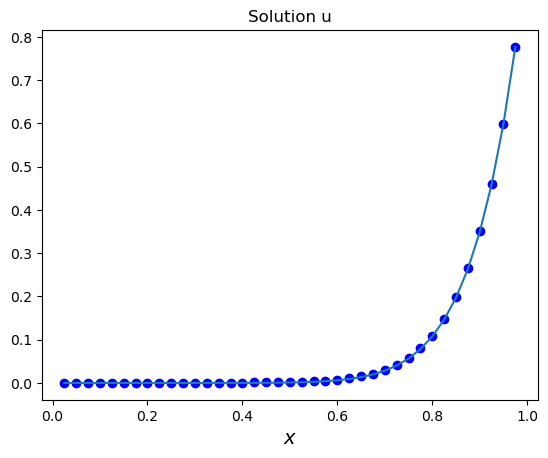

In [26]:
if (N<50):
    plt.plot(x,y,'bo')
plt.plot(x,sol)
plt.xlabel(u'$x$',fontsize=14)
plt.title(u'Solution u')
plt.show()

#### Avec Scipy

### Deuxième méthode

#### Avec Numpy

#### Avec Scipy

## Schéma n°2

### Première méthode

#### Avec Numpy

In [33]:
def f_2(x):
    return 90*x**8 + np.pi**2*x**10

In [34]:
# Partie C : 2e systeme Premiere methode
start_time = time.time()
N = 49
h = 1.0/N
print(f"N = {N} et h = {h}")

alpha = 0
beta = 1
d = -2/h**2 + np.pi**2
v = 1/h**2
l = 1/h**2

# Matrice A
A = np.diag(np.zeros(N-1)+d,k=0)
A = A + np.diag(np.zeros(N-2)+l,k=-1)
A = A + np.diag(np.zeros(N-2)+v,k=1)

G = np.zeros(N-1)
G[0] = -alpha/h**2
G[-1] = -beta/h**2

x = np.arange(1,N)*h

b = f_2(x) + G

sol = x**10

y = la.solve(A,b)

print(f"L'erreur est de : {la.norm(y-sol,np.inf)}")
print(f"elapsed time : {time.time()-start_time}\n")

N = 49 et h = 0.02040816326530612
L'erreur est de : 5.204646278465421
elapsed time : 0.0009975433349609375



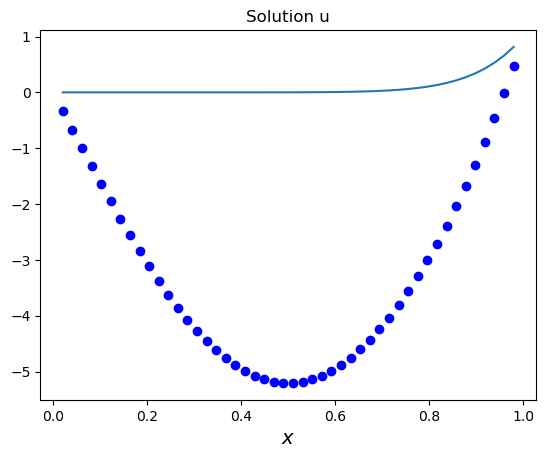

In [35]:
if (N<50):
    plt.plot(x,y,'bo')
plt.plot(x,sol)
plt.xlabel(u'$x$',fontsize=14)
plt.title(u'Solution u')
plt.show()

#### Avec Scipy

### Deuxième méthode

#### Avec Numpy

#### Avec Scipy